# Jegyzőkönyv 1 számolások


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Kornel\AppData\Local\Temp\ipykernel_15804\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. feladat

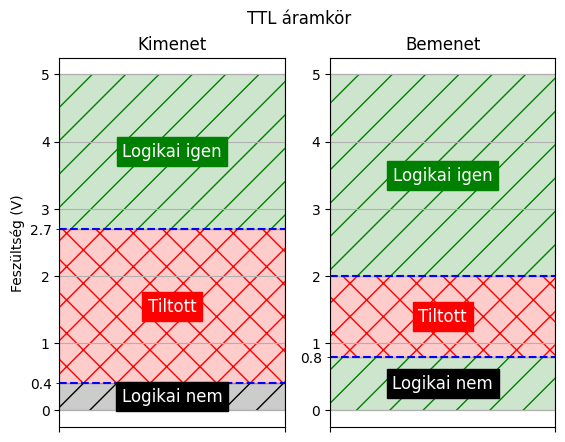

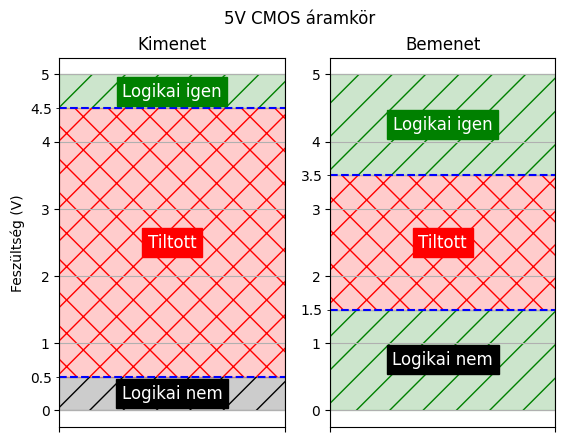

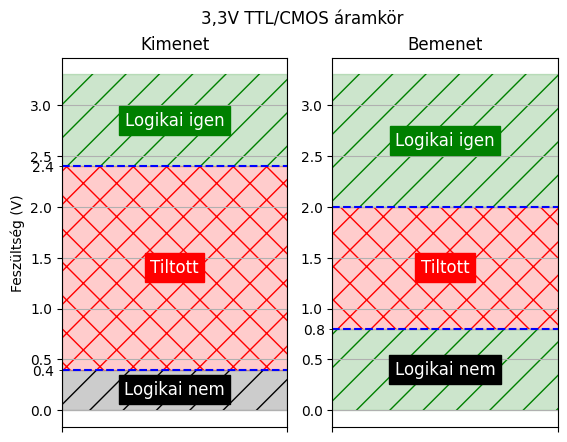

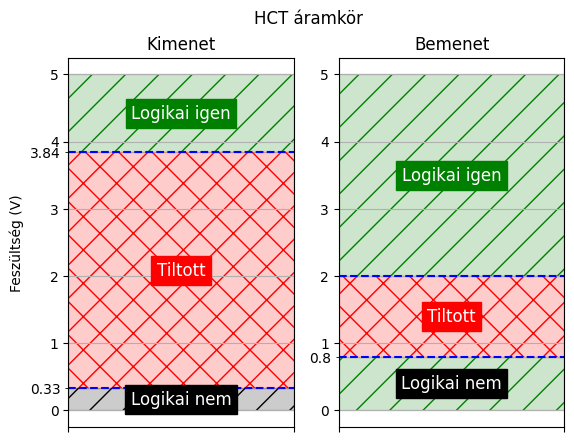

In [3]:
def logic_plot_generator(inp_false_cutoff, inp_true_cutoff, inp_label, out_false_cutoff, out_true_cutoff, out_label, title, volt_min = 0, volt_max = 5) -> None:
    TRUE_VAL = 1
    FALSE_VAL = 0

    fig = plt.figure()
    fig.suptitle(title)
    ax1 = plt.subplot(122)
    
    ax1.set_title('Bemenet')
    plt.yticks(np.arange(volt_min, volt_max, 0.5), minor=True)
    plt.axhline(y=inp_false_cutoff, color='blue', linestyle='--', label=f'{inp_false_cutoff}V')
    plt.axhline(y=inp_true_cutoff, color='blue', linestyle='--', label=f'{inp_true_cutoff}V')
    ax1.set_yticks([inp_false_cutoff, inp_true_cutoff], [f'{inp_false_cutoff}', f'{inp_true_cutoff}'], minor=True)
    
    plt.axhspan(volt_max, inp_true_cutoff, color='green', alpha=0.2, label='Igaz tartomány')
    plt.axhspan(volt_max, inp_true_cutoff, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_max - inp_true_cutoff) / 2) + inp_true_cutoff, 'Logikai igen', fontsize=12, ha='center', va='center', color='white', backgroundcolor='green')

    plt.axhspan(inp_false_cutoff, inp_true_cutoff, color='red', alpha=0.2, label='Tiltott tartomány')
    plt.axhspan(inp_false_cutoff, inp_true_cutoff, color='red', fill=None, linewidth=0, hatch="X", alpha=1)
    plt.text(0.5, ((inp_true_cutoff - inp_false_cutoff) / 2) + inp_false_cutoff, 'Tiltott', fontsize=12, ha='center', va='center', color='white', backgroundcolor='red')
    
    plt.axhspan(inp_false_cutoff, volt_min, color='green', alpha=0.2, label='Hamis tartomány')
    plt.axhspan(inp_false_cutoff, volt_min, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_min - inp_false_cutoff) / 2) + inp_false_cutoff, 'Logikai nem', fontsize=12, ha='center', va='center', color='white', backgroundcolor='black')

    plt.tick_params(axis='x', labelbottom=False)
    plt.xticks([FALSE_VAL, TRUE_VAL], ['0', '1'])
    plt.grid(True, which='both')

    ax2 = plt.subplot(121, sharex=ax1)
    ax2.title.set_text('Kimenet')
    plt.axhline(y=out_false_cutoff, color='blue', linestyle='--', label=f'{out_false_cutoff}V')
    plt.axhline(y=out_true_cutoff, color='blue', linestyle='--', label=f'{out_true_cutoff}V')
    ax2.set_yticks([out_false_cutoff, out_true_cutoff], [f'{out_false_cutoff}', f'{out_true_cutoff}'], minor=True)
    
    plt.axhspan(volt_max, out_true_cutoff, color='green', alpha=0.2, label='Igaz tartomány')
    plt.axhspan(volt_max, out_true_cutoff, color='green', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_max - out_true_cutoff) / 2) + out_true_cutoff, 'Logikai igen', fontsize=12, ha='center', va='center', color='white', backgroundcolor='green')

    plt.axhspan(out_false_cutoff, out_true_cutoff, color='red', alpha=0.2, label='Tiltott tartomány')
    plt.axhspan(out_false_cutoff, out_true_cutoff, color='red', fill=None, linewidth=0, hatch="X", alpha=1)
    plt.text(0.5, ((out_true_cutoff - out_false_cutoff) / 2) + out_false_cutoff, 'Tiltott', fontsize=12, ha='center', va='center', color='white', backgroundcolor='red')

    plt.axhspan(out_false_cutoff, volt_min, color='black', alpha=0.2, label='Hamis tartomány')
    plt.axhspan(out_false_cutoff, volt_min, color='black', fill=None, linewidth=0, hatch="/", alpha=1)
    plt.text(0.5, ((volt_min - out_false_cutoff) / 2) + out_false_cutoff, 'Logikai nem', fontsize=12, ha='center', va='center', color='white', backgroundcolor='black')

    plt.tick_params(axis='x', labelbottom=False)
    plt.ylabel('Feszültség (V)')
    plt.grid(True)
    plt.show()

logic_plot_generator(0.8, 2.0, 'Bemenet', 0.4, 2.7, 'Kimenet', 'TTL áramkör')
logic_plot_generator(1.5, 3.5, 'Bemenet', 0.5, 4.5, 'Kimenet', '5V CMOS áramkör')
logic_plot_generator(0.8, 2.0, 'Bemenet', 0.4, 2.4, 'Kimenet', '3,3V TTL/CMOS áramkör', 0, 3.3)
logic_plot_generator(0.8, 2.0, 'Bemenet', 0.33, 3.84, 'Kimenet', 'HCT áramkör')

### Ábrázolások

## 2. feladat

### Szimulátor
[![áramkör](./jegyzokonyv01/abra1.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAlFZNEU47rzAEoosDSQ0p0BGwDmINAgHJSvJQLRoIUtsiwRWvfoJTEayFPCixISDgwDOAS0cAXAIYA7AMYM2AA4oaihoIqq8ESD0ugDupsjmCSGQbPFGwZEhUanp2SEamVBpRTzhYaEiqQBOpRWFZWJYcGxuisqVigTlVSg2CGriYKQIJLhqxMSWMMT4uMLIuATIYCSkYEioNAAmDABmHgCuADZuJWHhYBAXRbld4QUdOefdRbi4Kikv4TzRH6apILvFS-YFvUQ1e7gEQ3DI0bQtLg3YRQqRiCQQ-psAAeIAIpBQ8ys9EWlEMvAACuxcWM8ZRsCJSDRySAOGgcYpEoT1LhLIskCyOOwgA)

### Mérések és ábrák

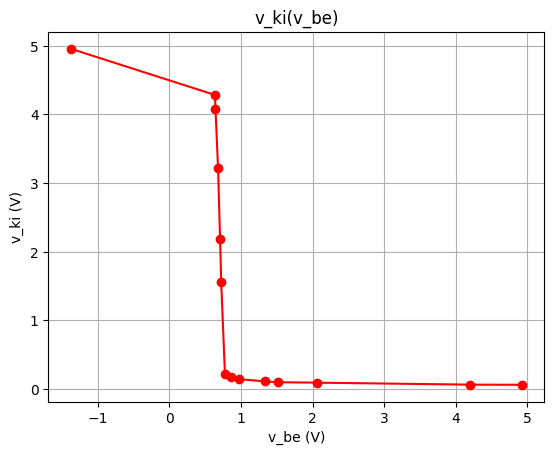

In [4]:
v_be = pd.array([
        4.922, #0
        4.2, #1k
        2.061, #10k
        1.517, #20k
        1.34, #30k
        0.978, # 66k
        0.855, # 120k
        0.777, # 240k
        0.725, # 500k
        0.709, #620k
        0.681, # 1m
        0.645, # 2m
        0.637, # 2.5m
        -1.375 # 3m
])

v_ki = pd.array([
        0.063, #0
        0.065, #1k
        0.094, #10k
        0.1, #20k
        0.112, #30k
        0.145, #66k
        0.174, #120k
        0.224, #240k
        1.553, #500k
        2.188, #620k
        3.212, #1m
        4.081, #2m
        4.283, #2.5m
        4.955, #3m
])

# plot v_ki by v_be
plt.plot(v_be, v_ki, 'ro-')
plt.title('v_ki(v_be)')
plt.xlabel('v_be (V)')
plt.ylabel('v_ki (V)')
plt.grid()
plt.show()

## 3-4-5. feladat

### Áramkörök

#### Átmeneti függvény vizsgálat
[![áramkör](./jegyzokonyv01/abra2.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAlEJhYmptAQLde-XLmJQpYGkhrzoCNgEluYXGm5pe3CcIE6FSJQHNdBCAMLnLyLJPlsADmuKXtkpmDdbr9R3aWolpCImDuMigo8FDQFsRIHAwAzgCWyQAuAIYAdgDGDGwA7mHuOjzImgYOxa5lnupVHlC1Xj5W+rgWvsKQrcECaEF8PS0lPCMdIpWjfS5M4p7NCxKj-mO6xPrLi1qGrbtTC91TfQBO003l3vVSqP0z1Ze6kBB94zd7De34bw9N1ja7msc2eC1edReEHWfSAA)

#### Logikai igaz vizsgálat
[![áramkör](./jegyzokonyv01/abra3.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAlEJhYmptL269+uXMSiSwNJDTnQEbAJLC+3QRKZhSmjZJhJFAd27bdQrcQgChkNgHNTV9YSfXkWCXLYAHN+oswZwFXem8TS2s9LTgArzYAJ1NYm00xcy8QDDsPa1wMdTQ8goEsNBQUeHkKBGyq+uQQDgYAZwBLFoAXAEMAOwBjBk5ufP40AgIRkvT9cBlZgzYADxGsUnVcSaZxKNwkCGRyjnYV7dcbcoFSKO1wFHKABXYI6THAlIxJuwiZ1JHxFxfXz-XTnV6AkBhKBsIA)

#### Logikai hamis vizsgálat
[![áramkör](./jegyzokonyv01/abra4.png)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgBJEJhYmptL25hSxboLE0YSBGwDuw0eKFMwxCAKGQ2Ac2HruyLGNUGWYCFLYAHfRol3xhEPSsLT9lWDjLJbAE7CPpomuLgmDjQY2kYauBjiaHEJAlhoKCjwUtAUCNFZBcggAEoMAM4AlmUALgCGAHYAxgxsAB7cuFik4rgEHWZouEgQyOnF7O1M+H2a6QKk9iLgKOkACuzu3vwOqsEYfdruYREqx04HNh3h50Hbzq5Q8h0paEnP-EZ+m2af74bGj2+9mcHn+X0cLABPD4YMB3F4HyhCN8jyAA)

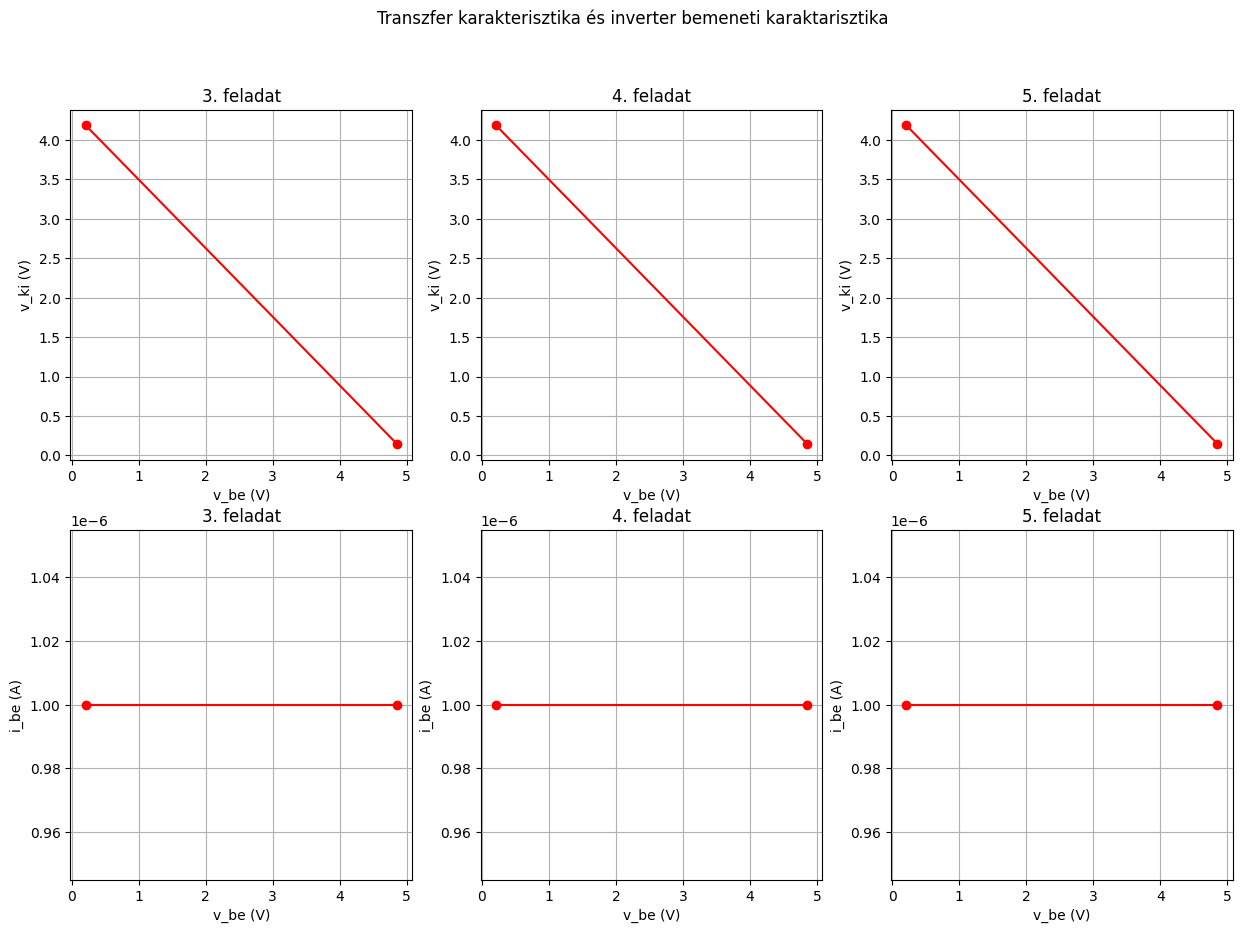

In [5]:
r = 10

fel3_v_be = pd.array([
    0.212,
    4.851,
])

fel3_iv_be = pd.array([
    0.00001,
    0.00001,
])

fel3_i_be = fel3_iv_be / r

fel3_v_ki = pd.array([
    4.185,
    0.148,
])

fel4_v_be = pd.array([
    0.212,
    4.851,
])

fel4_iv_be = pd.array([
    0.00001,
    0.00001,
])

fel4_i_be = fel4_iv_be / r

fel4_v_ki = pd.array([
    4.185,
    0.148,
])

fel5_v_be = pd.array([
    0.212,
    4.851,
])

fel5_iv_be = pd.array([
    0.00001,
    0.00001,
])

fel5_i_be = fel5_iv_be / r

fel5_v_ki = pd.array([
    4.185,
    0.148,
])

# plot v_ki by v_be, then i_be by v_be
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Transzfer karakterisztika és inverter bemeneti karaktarisztika')

ax[0][0].plot(fel3_v_be, fel3_v_ki, 'ro-')
ax[0][0].title.set_text('3. feladat')
ax[0][0].set_xlabel('v_be (V)')
ax[0][0].set_ylabel('v_ki (V)')
ax[0][0].grid()

ax[0][1].plot(fel4_v_be, fel4_v_ki, 'ro-')
ax[0][1].title.set_text('4. feladat')
ax[0][1].set_xlabel('v_be (V)')
ax[0][1].set_ylabel('v_ki (V)')
ax[0][1].grid()

ax[0][2].plot(fel5_v_be, fel5_v_ki, 'ro-')
ax[0][2].title.set_text('5. feladat')
ax[0][2].set_xlabel('v_be (V)')
ax[0][2].set_ylabel('v_ki (V)')
ax[0][2].grid()

ax[1][0].plot(fel3_v_be, fel3_i_be, 'ro-')
ax[1][0].title.set_text('3. feladat')
ax[1][0].set_xlabel('v_be (V)')
ax[1][0].set_ylabel('i_be (A)')
ax[1][0].grid()

ax[1][1].plot(fel4_v_be, fel4_i_be, 'ro-')
ax[1][1].title.set_text('4. feladat')
ax[1][1].set_xlabel('v_be (V)')
ax[1][1].set_ylabel('i_be (A)')
ax[1][1].grid()

ax[1][2].plot(fel5_v_be, fel5_i_be, 'ro-')
ax[1][2].title.set_text('5. feladat')
ax[1][2].set_xlabel('v_be (V)')
ax[1][2].set_ylabel('i_be (A)')
ax[1][2].grid()

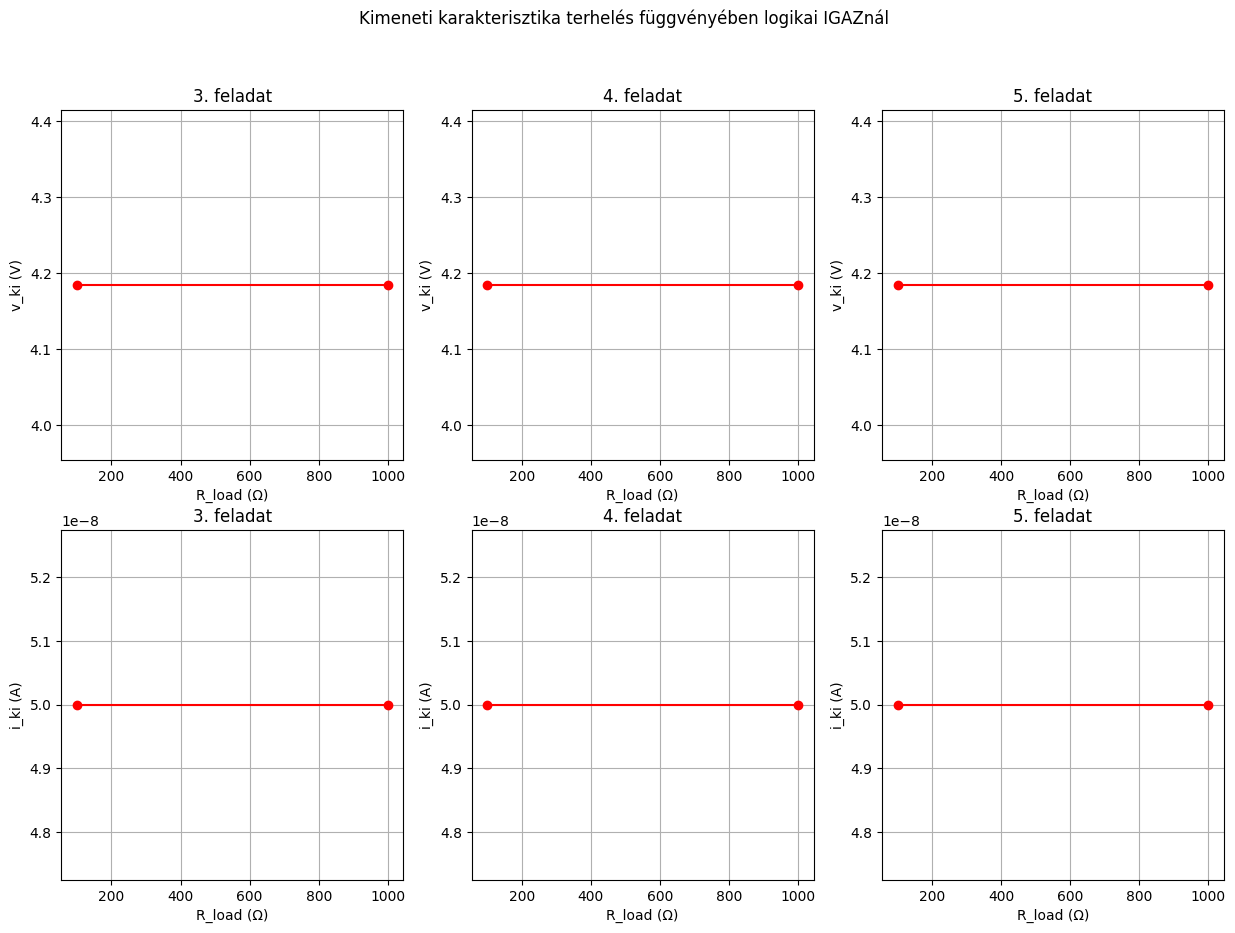

In [19]:
r = 200

fel3_r_load = pd.array([
    100,
    1000,
])

fel3_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel3_i_ki = fel3_iv_ki / r

fel3_v_ki = pd.array([
    4.185,
    4.185,
])

fel4_r_load = pd.array([
    100,
    1000,
])

fel4_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel4_i_ki = fel4_iv_ki / r

fel4_v_ki = pd.array([
    4.185,
    4.185,
])

fel5_r_load = pd.array([
    100,
    1000,
])

fel5_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel5_i_ki = fel5_iv_ki / r

fel5_v_ki = pd.array([
    4.185,
    4.185,
])


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Kimeneti karakterisztika terhelés függvényében logikai IGAZnál')

ax[0][0].plot(fel3_r_load, fel3_v_ki, 'ro-')
ax[0][0].title.set_text('3. feladat')
ax[0][0].set_xlabel('R_load (Ω)')
ax[0][0].set_ylabel('v_ki (V)')
ax[0][0].grid()

ax[0][1].plot(fel4_r_load, fel4_v_ki, 'ro-')
ax[0][1].title.set_text('4. feladat')
ax[0][1].set_xlabel('R_load (Ω)')
ax[0][1].set_ylabel('v_ki (V)')
ax[0][1].grid()

ax[0][2].plot(fel5_r_load, fel5_v_ki, 'ro-')
ax[0][2].title.set_text('5. feladat')
ax[0][2].set_xlabel('R_load (Ω)')
ax[0][2].set_ylabel('v_ki (V)')
ax[0][2].grid()

ax[1][0].plot(fel3_r_load, fel3_i_ki, 'ro-')
ax[1][0].title.set_text('3. feladat')
ax[1][0].set_xlabel('R_load (Ω)')
ax[1][0].set_ylabel('i_ki (A)')
ax[1][0].grid()

ax[1][1].plot(fel4_r_load, fel4_i_ki, 'ro-')
ax[1][1].title.set_text('4. feladat')
ax[1][1].set_xlabel('R_load (Ω)')
ax[1][1].set_ylabel('i_ki (A)')
ax[1][1].grid()

ax[1][2].plot(fel5_r_load, fel5_i_ki, 'ro-')
ax[1][2].title.set_text('5. feladat')
ax[1][2].set_xlabel('R_load (Ω)')
ax[1][2].set_ylabel('i_ki (A)')
ax[1][2].grid()



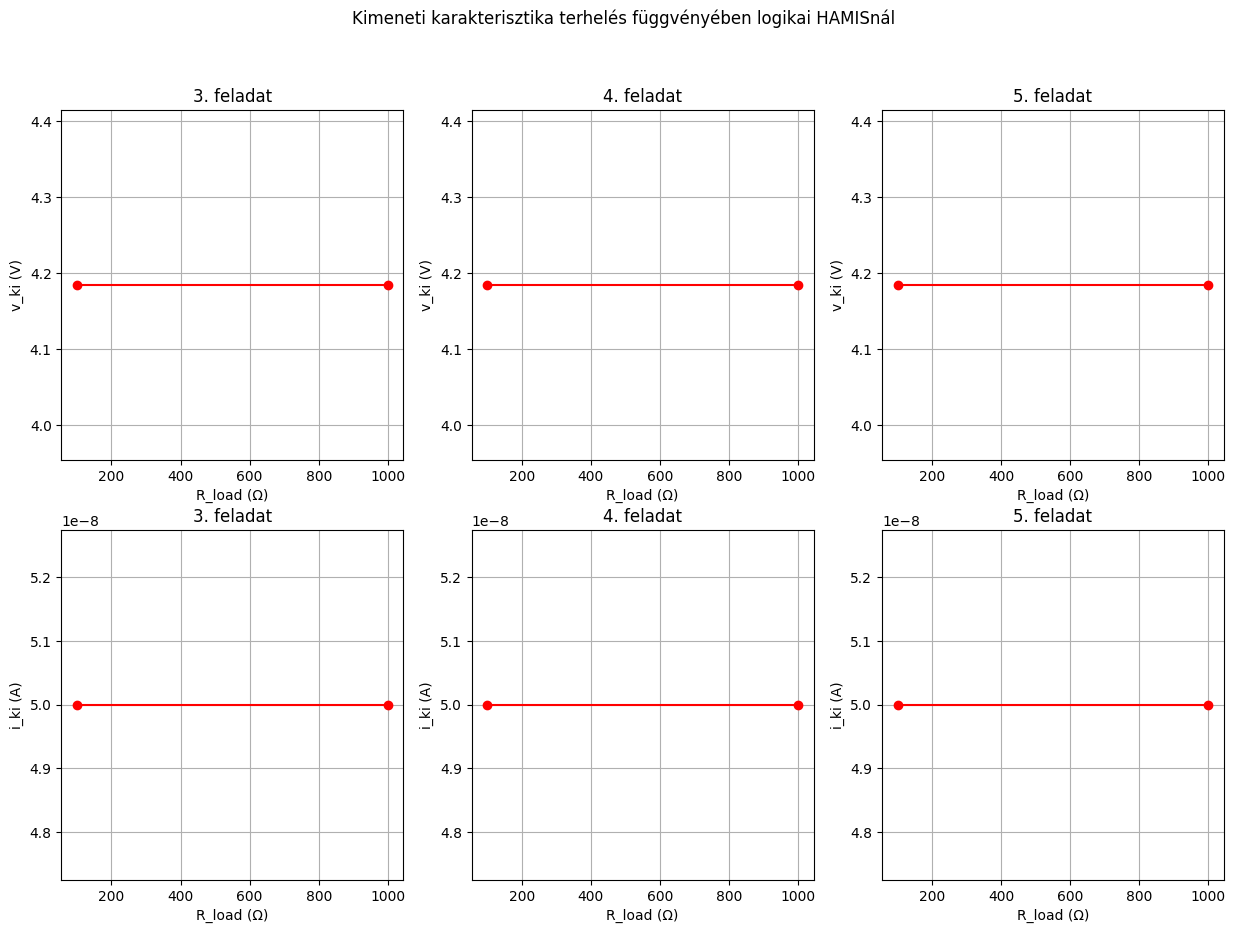

In [18]:
r = 200

fel3_r_load = pd.array([
    100,
    1000,
])

fel3_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel3_i_ki = fel3_iv_ki / r

fel3_v_ki = pd.array([
    4.185,
    4.185,
])

fel4_r_load = pd.array([
    100,
    1000,
])

fel4_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel4_i_ki = fel4_iv_ki / r

fel4_v_ki = pd.array([
    4.185,
    4.185,
])

fel5_r_load = pd.array([
    100,
    1000,
])

fel5_iv_ki = pd.array([
    0.00001,
    0.00001,
])

fel5_i_ki = fel5_iv_ki / r

fel5_v_ki = pd.array([
    4.185,
    4.185,
])


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Kimeneti karakterisztika terhelés függvényében logikai HAMISnál')

ax[0][0].plot(fel3_r_load, fel3_v_ki, 'ro-')
ax[0][0].title.set_text('3. feladat')
ax[0][0].set_xlabel('R_load (Ω)')
ax[0][0].set_ylabel('v_ki (V)')
ax[0][0].grid()

ax[0][1].plot(fel4_r_load, fel4_v_ki, 'ro-')
ax[0][1].title.set_text('4. feladat')
ax[0][1].set_xlabel('R_load (Ω)')
ax[0][1].set_ylabel('v_ki (V)')
ax[0][1].grid()

ax[0][2].plot(fel5_r_load, fel5_v_ki, 'ro-')
ax[0][2].title.set_text('5. feladat')
ax[0][2].set_xlabel('R_load (Ω)')
ax[0][2].set_ylabel('v_ki (V)')
ax[0][2].grid()

ax[1][0].plot(fel3_r_load, fel3_i_ki, 'ro-')
ax[1][0].title.set_text('3. feladat')
ax[1][0].set_xlabel('R_load (Ω)')
ax[1][0].set_ylabel('i_ki (A)')
ax[1][0].grid()

ax[1][1].plot(fel4_r_load, fel4_i_ki, 'ro-')
ax[1][1].title.set_text('4. feladat')
ax[1][1].set_xlabel('R_load (Ω)')
ax[1][1].set_ylabel('i_ki (A)')
ax[1][1].grid()

ax[1][2].plot(fel5_r_load, fel5_i_ki, 'ro-')
ax[1][2].title.set_text('5. feladat')
ax[1][2].set_xlabel('R_load (Ω)')
ax[1][2].set_ylabel('i_ki (A)')
ax[1][2].grid()